Data science : proyectos 


In [24]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

from tkinter import Tk
from tkinter.filedialog import askopenfilename
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score , precision_recall_curve
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from xgboost import XGBClassifier





In [25]:
data = pd.read_csv("C:\\Users\\USUARIO\\Desktop\\practica vs\\credit_card_fraud_dataset.csv")
print (data.head())

   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType      Location  IsFraud  
0          refund   San Antonio        0  
1          refund        Dallas        0  
2        purchase      New York        0  
3        purchase  Philadelphia        0  
4        purchase       Phoenix        0  


In [26]:
# Contar la cantidad de 0 y 1 en la columna IsFraud
fraud_counts = data['IsFraud'].value_counts()

# Mostrar el resultado en forma de tabla
print(fraud_counts)

IsFraud
0    99000
1     1000
Name: count, dtype: int64


In [27]:
# Contar la cantidad de 0 y 1 en la columna IsFraud
location= data['Location'].value_counts()

# Mostrar el resultado en forma de tabla
print(location)

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64


In [28]:
# Contar la cantidad de 0 y 1 en la columna IsFraud
transaction_type= data['TransactionType'].value_counts()

# Mostrar el resultado en forma de tabla
print(transaction_type)

TransactionType
refund      50131
purchase    49869
Name: count, dtype: int64


In [29]:
# Convertir la variable categórica 'Location' en variables dummy usando One-Hot Encoding
data = pd.get_dummies(data, columns=['Location'], drop_first=True)

# Verificar las nuevas columnas generadas
print(data.head())

   TransactionID             TransactionDate   Amount  MerchantID  \
0              1  2024-04-03 14:15:35.462794  4189.27         688   
1              2  2024-03-19 13:20:35.462824  2659.71         109   
2              3  2024-01-08 10:08:35.462834   784.00         394   
3              4  2024-04-13 23:50:35.462850  3514.40         944   
4              5  2024-07-12 18:51:35.462858   369.07         475   

  TransactionType  IsFraud  Location_Dallas  Location_Houston  \
0          refund        0            False             False   
1          refund        0             True             False   
2        purchase        0            False             False   
3        purchase        0            False             False   
4        purchase        0            False             False   

   Location_Los Angeles  Location_New York  Location_Philadelphia  \
0                 False              False                  False   
1                 False              False              

In [30]:

# Convertir a datetime si aún no lo has hecho
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Extraer características temporales
data['Year'] = data['TransactionDate'].dt.year
data['Month'] = data['TransactionDate'].dt.month
data['Day'] = data['TransactionDate'].dt.day
data['Hour'] = data['TransactionDate'].dt.hour
data['Minute'] = data['TransactionDate'].dt.minute
data['DayOfWeek'] = data['TransactionDate'].dt.dayofweek  # 0 es lunes, 6 es domingo

# Codificación cíclica para variables temporales
# Codificar el mes de forma cíclica
data['Month_sin'] = np.sin(2 * np.pi * data['Month'] / 12)
data['Month_cos'] = np.cos(2 * np.pi * data['Month'] / 12)

# Codificar la hora de forma cíclica
data['Hour_sin'] = np.sin(2 * np.pi * data['Hour'] / 24)
data['Hour_cos'] = np.cos(2 * np.pi * data['Hour'] / 24)

# Codificar el día de la semana de forma cíclica
data['DayOfWeek_sin'] = np.sin(2 * np.pi * data['DayOfWeek'] / 7)
data['DayOfWeek_cos'] = np.cos(2 * np.pi * data['DayOfWeek'] / 7)



# Eliminar la columna original de fechas, ya que ahora tenemos características derivadas
data = data.drop(['TransactionDate'], axis=1)


# Suponiendo que ya has cargado tus datos en un DataFrame llamado `data`
# Reemplazar 'refund' por 0 y 'purchase' por 1
data['TransactionType'] = data['TransactionType'].map({'refund': 0, 'purchase': 1})


# Ver los primeros registros para revisar las nuevas columnas
print(data.head())


   TransactionID   Amount  MerchantID  TransactionType  IsFraud  \
0              1  4189.27         688                0        0   
1              2  2659.71         109                0        0   
2              3   784.00         394                1        0   
3              4  3514.40         944                1        0   
4              5   369.07         475                1        0   

   Location_Dallas  Location_Houston  Location_Los Angeles  Location_New York  \
0            False             False                 False              False   
1             True             False                 False              False   
2            False             False                 False               True   
3            False             False                 False              False   
4            False             False                 False              False   

   Location_Philadelphia  ...  Day  Hour  Minute  DayOfWeek  Month_sin  \
0                  False  ...    3  

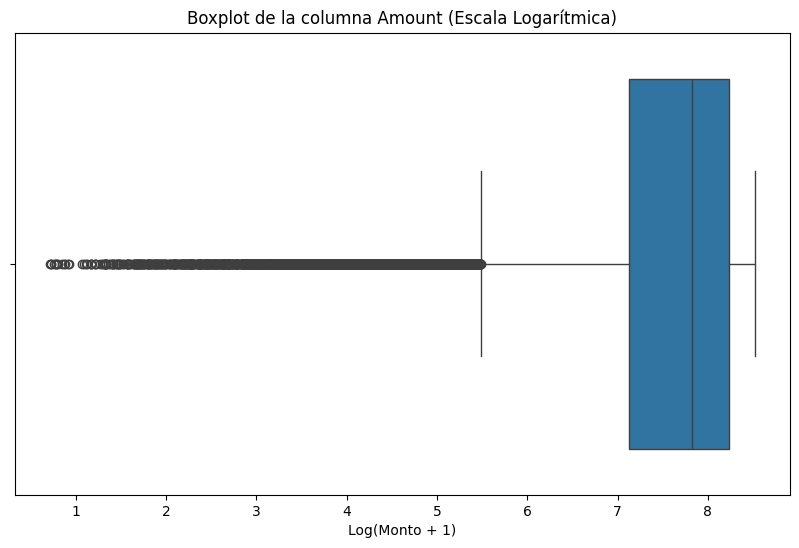

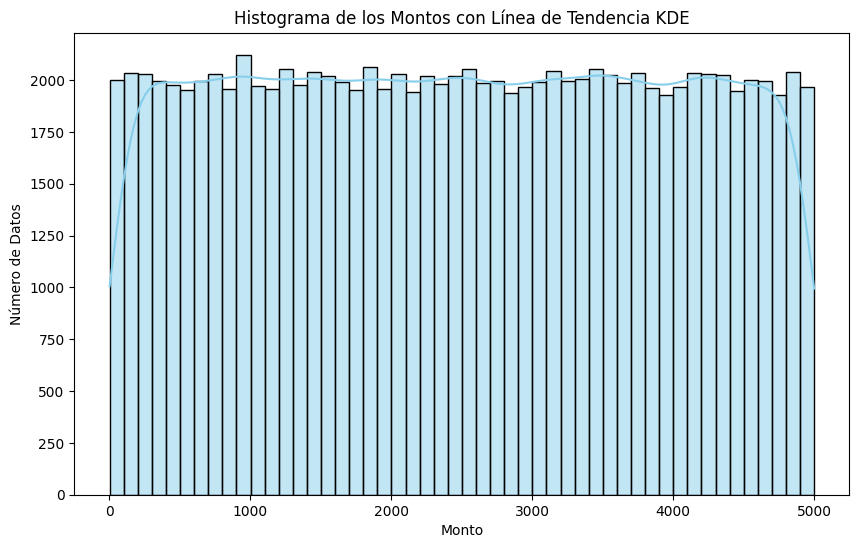

In [31]:
# Boxplot para visualizar outliers en la columna 'Amount' con escala logarítmica
plt.figure(figsize=(10, 6))
sns.boxplot(x=np.log1p(data['Amount']))  # Aplicamos log1p para manejar bien los ceros y valores pequeños
plt.title('Boxplot de la columna Amount (Escala Logarítmica)')
plt.xlabel('Log(Monto + 1)')
plt.show()

# Histograma con línea de tendencia (KDE) para visualizar la distribución de los montos
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histograma de los Montos con Línea de Tendencia KDE')
plt.xlabel('Monto')
plt.ylabel('Número de Datos')
plt.show()

In [9]:
# Obtener estadísticas descriptivas de la columna 'Amount'
amount_stats = data['Amount'].describe()

# Imprimir resultados
print(amount_stats)

count    100000.000000
mean       2497.092666
std        1442.415999
min           1.050000
25%        1247.955000
50%        2496.500000
75%        3743.592500
max        4999.770000
Name: Amount, dtype: float64


In [10]:
# Mostrar la fila 500 de 'data'
fila_500 = data.iloc[499]  # Los índices en pandas comienzan desde 0
print(fila_500)

TransactionID                 500
Amount                    4413.47
MerchantID                    522
TransactionType                 1
IsFraud                         0
Location_Dallas             False
Location_Houston            False
Location_Los Angeles        False
Location_New York           False
Location_Philadelphia       False
Location_Phoenix             True
Location_San Antonio        False
Location_San Diego          False
Location_San Jose           False
Year                         2024
Month                           5
Day                            12
Hour                           11
Minute                         13
DayOfWeek                       6
Month_sin                     0.5
Month_cos               -0.866025
Hour_sin                 0.258819
Hour_cos                -0.965926
DayOfWeek_sin           -0.781831
DayOfWeek_cos             0.62349
Name: 499, dtype: object


In [37]:
# Separar características (X) y variable objetivo (y)
X = data.drop(['IsFraud'], axis=1)  # Todas las columnas excepto IsFraud
y = data['IsFraud']  # La columna IsFraud
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [38]:
print("Conteo de clases en y_train_smote:")
print(pd.Series(y_train).value_counts().sort_index())

Conteo de clases en y_train_smote:
IsFraud
0    69300
1      700
Name: count, dtype: int64


In [39]:


# Sobremuestreo con SMOTE para tratar el desbalanceo
smote = SMOTE(sampling_strategy='minority', random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Calcular scale_pos_weight basado en la distribución original
neg_pos_ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])
print(f"\nRelación original negativo/positivo: {neg_pos_ratio:.2f}")


Relación original negativo/positivo: 99.00


In [36]:
print("Conteo de clases en y_train_smote:")
print(pd.Series(y_train_smote).value_counts().sort_index())

Conteo de clases en y_train_smote:
IsFraud
0    69300
1    69300
Name: count, dtype: int64


In [50]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
# Definir los 4 modelos
models = {
    'XGBoost': XGBClassifier(
        scale_pos_weight=neg_pos_ratio,
        use_label_encoder=False,
        eval_metric='auc',
        random_state=42
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=200,
        class_weight='balanced',
        random_state=42
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=200,
        scale_pos_weight=neg_pos_ratio,
        random_state=42
    ),
    'CatBoost': CatBoostClassifier(
        iterations=200,
        scale_pos_weight=neg_pos_ratio,
        random_state=42,
        verbose=False
    )
}


Entrenando XGBoost...


c:\Users\USUARIO\anaconda3\envs\viernes\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:19:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Resultados para XGBoost:
AUC-ROC: 0.5219

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     29700
           1       0.01      0.08      0.02       300

    accuracy                           0.93     30000
   macro avg       0.50      0.51      0.49     30000
weighted avg       0.98      0.93      0.95     30000



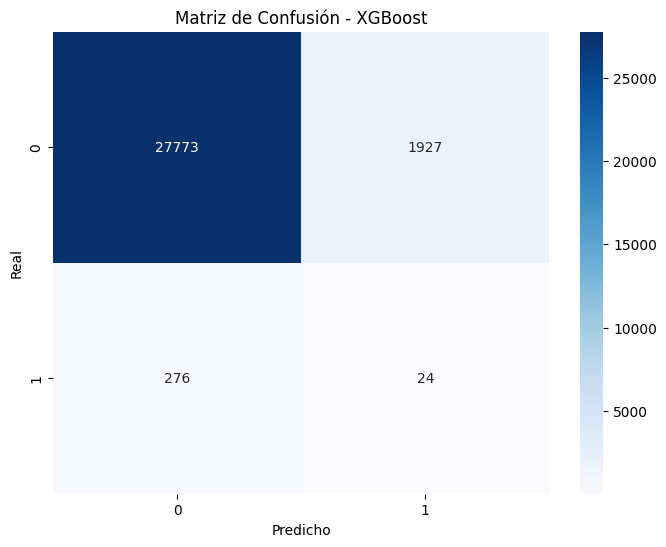

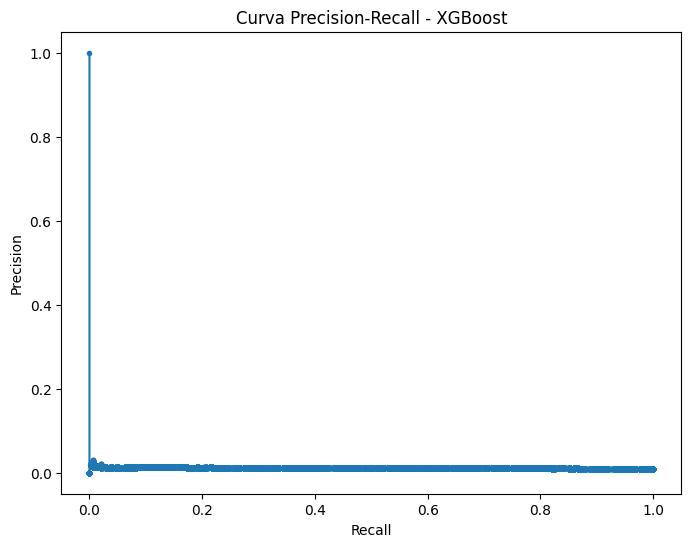


Entrenando RandomForest...

Resultados para RandomForest:
AUC-ROC: 0.5204

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.99     30000



c:\Users\USUARIO\anaconda3\envs\viernes\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USUARIO\anaconda3\envs\viernes\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USUARIO\anaconda3\envs\viernes\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

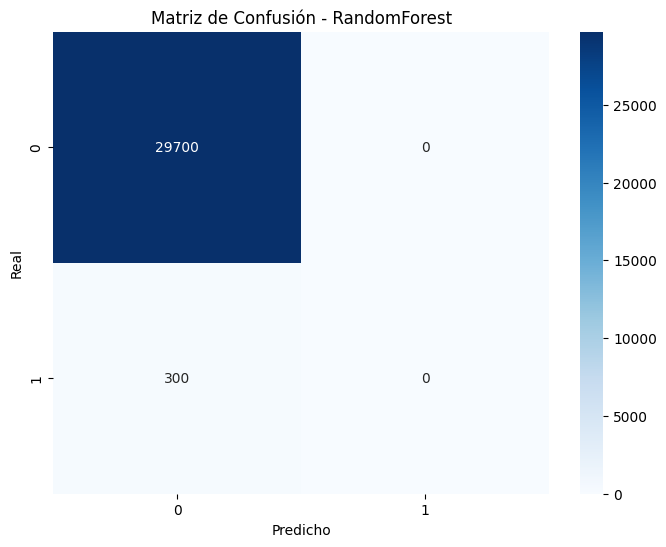

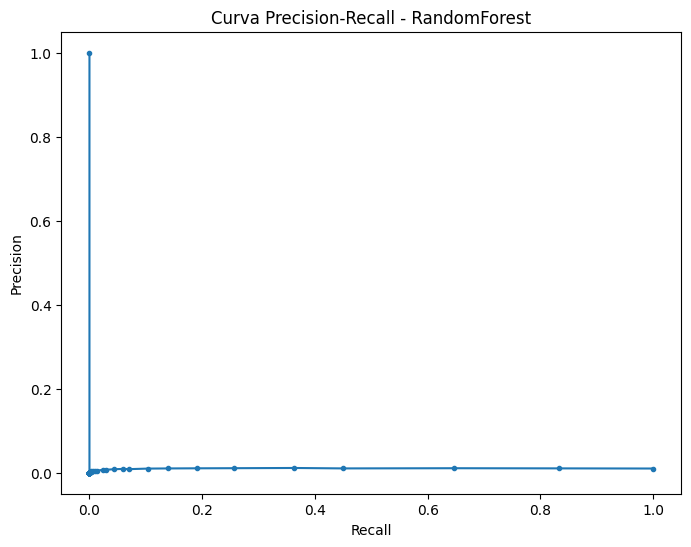


Entrenando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 69300, number of negative: 69300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2454
[LightGBM] [Info] Number of data points in the train set: 138600, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Resultados para LightGBM:
AUC-ROC: 0.5054

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.90      0.95     29700
           1       0.01      0.13      0.02       300

    accuracy                           0.90     30000
   macro avg       0.50      0.52      0.48     30000
weighted avg       0.98      0.90      0.94     30

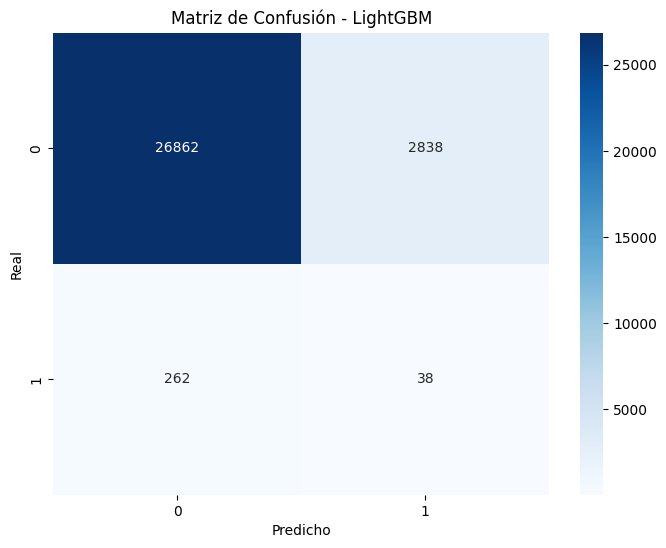

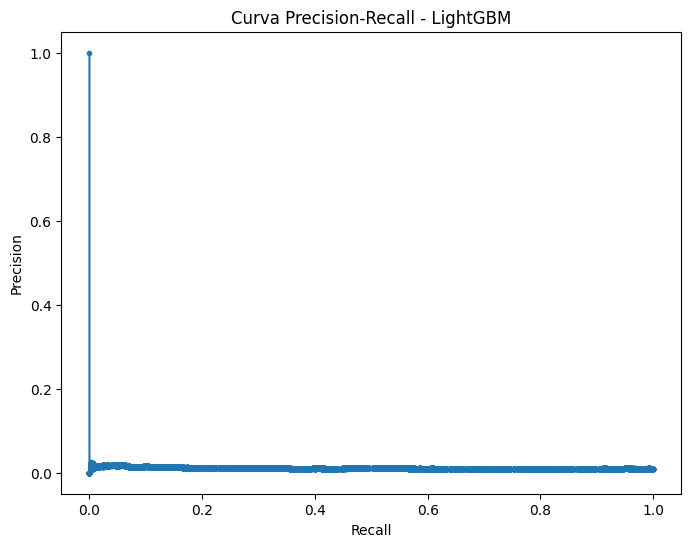


Entrenando CatBoost...

Resultados para CatBoost:
AUC-ROC: 0.5101

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83     29700
           1       0.01      0.32      0.02       300

    accuracy                           0.71     30000
   macro avg       0.50      0.51      0.42     30000
weighted avg       0.98      0.71      0.82     30000



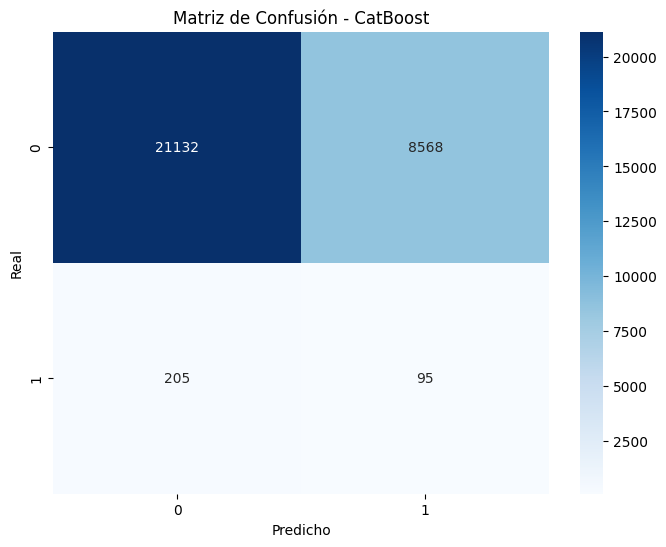

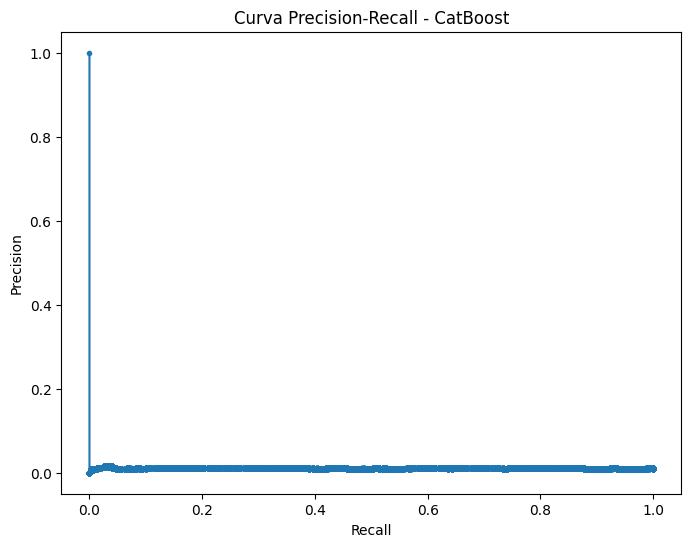

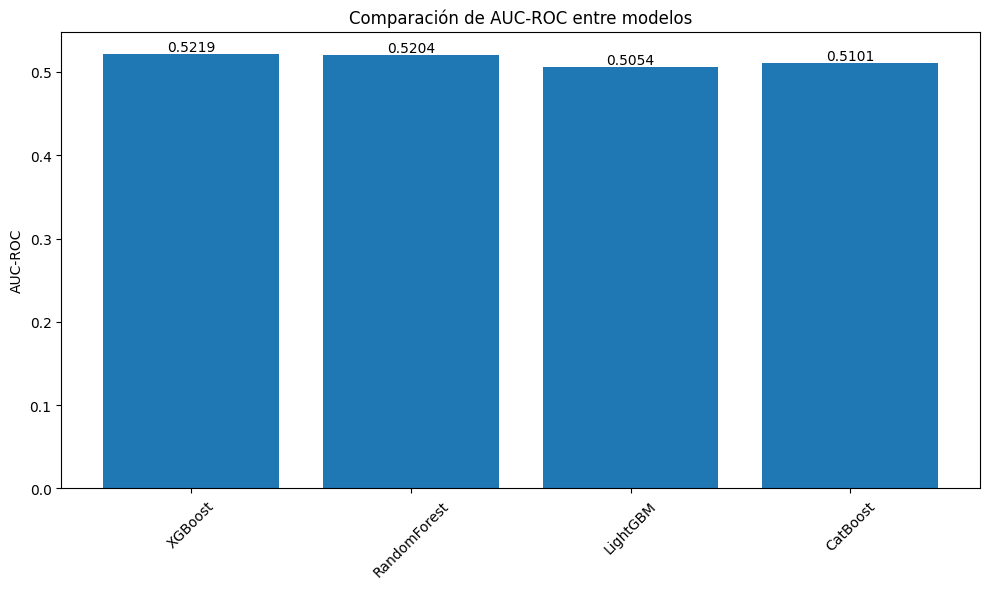

In [51]:
# Diccionarios para almacenar resultados
predictions = {}
probabilities = {}
metrics = {}

# Entrenar y evaluar cada modelo
for name, model in models.items():
    print(f"\nEntrenando {name}...")
    
    # Entrenar modelo
    model.fit(X_train_smote, y_train_smote)
    
    # Hacer predicciones
    predictions[name] = model.predict(X_test)
    probabilities[name] = model.predict_proba(X_test)[:, 1]
    
    # Calcular métricas
    metrics[name] = {
        'roc_auc': roc_auc_score(y_test, probabilities[name]),
        'classification_report': classification_report(y_test, predictions[name])
    }
    
    # Imprimir resultados
    print(f"\nResultados para {name}:")
    print(f"AUC-ROC: {metrics[name]['roc_auc']:.4f}")
    print("\nReporte de clasificación:")
    print(metrics[name]['classification_report'])
    
    # Visualizar matriz de confusión
    plt.figure(figsize=(8, 6))
    conf_matrix = confusion_matrix(y_test, predictions[name])
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()
    
    # Visualizar curva Precision-Recall
    plt.figure(figsize=(8, 6))
    precision, recall, _ = precision_recall_curve(y_test, probabilities[name])
    plt.plot(recall, precision, marker='.')
    plt.title(f'Curva Precision-Recall - {name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

# Comparar AUC-ROC de todos los modelos
plt.figure(figsize=(10, 6))
auc_scores = [metrics[name]['roc_auc'] for name in models.keys()]
plt.bar(models.keys(), auc_scores)
plt.title('Comparación de AUC-ROC entre modelos')
plt.ylabel('AUC-ROC')
plt.xticks(rotation=45)
for i, v in enumerate(auc_scores):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()